 ### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

In [5]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

Importo le immagini scritte tramite GIMP:

In [6]:
#IMPORT IMAGES
from PIL import Image
import os

images_vector = []

for i in range(10):
    digit_filename = "./numbers/" + str(i) + ".png"    
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE
    ydim, xdim = digit_in.size    
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    images_vector.append(data)

Importo il modello sviluppato ed allenato nell'esercizio 2:

In [7]:
#IMPORT MODEL
model = tf.keras.models.load_model(filepath="CNN_image_recognition.h5")

Faccio agire il modello sulle immagini precedentemente importate:

1/1 [==============================] - 0s 109ms/step


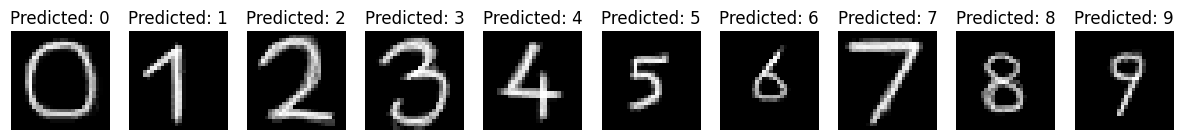

In [8]:
#PREDICTIONS
predictions = model.predict(np.array(images_vector))

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(images_vector[i], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Tutti i numeri sono predetti correttamente.
Abbiamo notato che i numeri scritti grandi (che occupano tutta la casella) vengono indovinati con maggior fatica: questo perchè, presumibilmente, il training avviene prevalemntemente tramite numeri scritti in piccolo e in centro.